# Grupo 14:
 * Mario Campos Vicente
 * Gonzalo Lardiés Guillén
 * Adrián Sequera Robledo

En primer lugar importamos los módulos necesarios:

In [1]:
from main import get_points, plot_images, WatershedExerciseP2
from Anisotropic_Diffusion_ref import anisodiff
import matplotlib # Para poder abrir una ventana externa y seleccionar las semillas

C:\Users\ADRIAN\Anaconda3\envs\AIM_GIB_20_21\lib\site-packages\skimage\viewer\utils\__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *


Seleccionamos las 3 imágenes que vamos a utilizar:

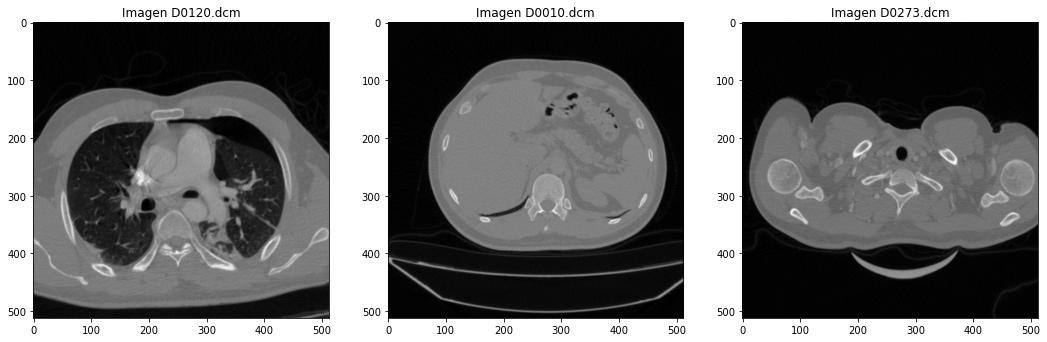

In [2]:
%matplotlib inline
plot_images(["D0120.dcm","D0010.dcm","D0273.dcm"])

A continuación se va a aplicar el método de Watershed para segmentar nuestras regiones modificando como parámtero el filtro inicial (Sobel o Canny) 

**1) Imágenes de segmentación de los pulmones**

Número de semillas seleccionadas: 7


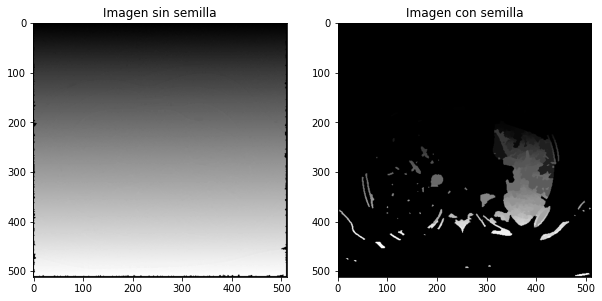

In [3]:
seed_coord,img = get_points("D0120.dcm")
%matplotlib inline
final_image = WatershedExerciseP2(img,seed_coord)

Número de semillas seleccionadas: 7


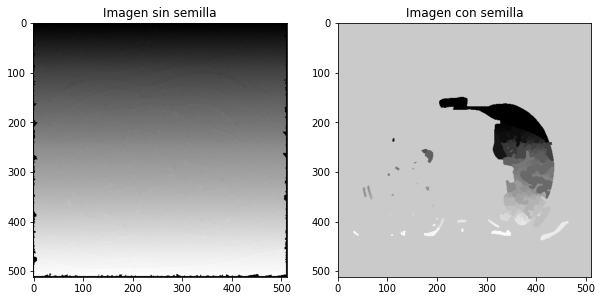

In [4]:
%matplotlib inline
final_image = WatershedExerciseP2(img,seed_coord, suavizado=True, iters=3) 

Número de semillas seleccionadas: 7


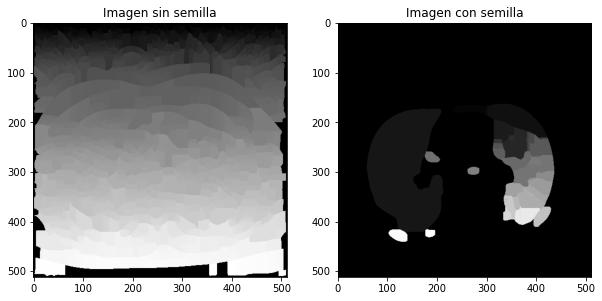

In [5]:
%matplotlib inline
final_image = WatershedExerciseP2(img,seed_coord, suavizado=True, iters=50) 

En el primer set de imágenes aplicamos Watershed sin aplicar antes filtro anisotrópico. En los dos siguientes sets de imágenes aplicamos previamente un filtro anisotrópico y cambiamos el número de iteraciones. 

Se puede observar que aplicando el anisotrópico antes, obtenemos un resultado más suavizado. Esto es así ya que estamos eliminando ruido en la imagen original, y por consiguiente, estamos reduciendo el número de mínimos locales de la imagen. A mayor número de iteraciones, mayor suavizado.

**2) Imágenes de segmentación de la columna vertebral**

Número de semillas seleccionadas: 7


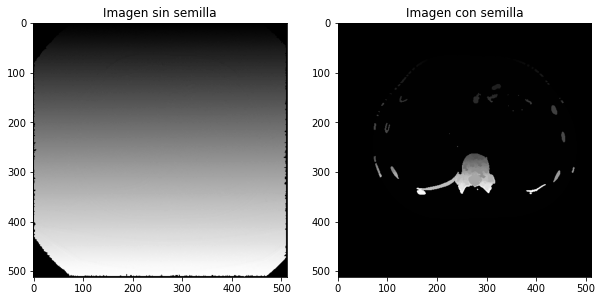

In [6]:
seed_coord,img = get_points("D0010.dcm") 
%matplotlib inline
final_image = WatershedExerciseP2(img,seed_coord)

Número de semillas seleccionadas: 7


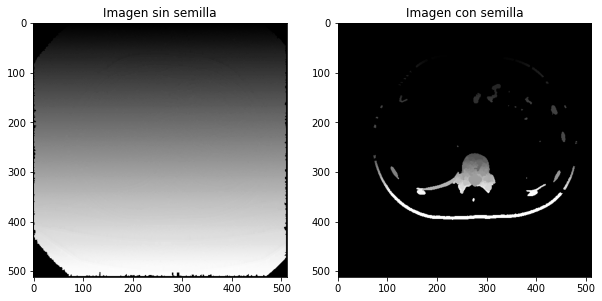

In [7]:
%matplotlib inline
final_image = WatershedExerciseP2(img,seed_coord, suavizado=True, iters=1)

Número de semillas seleccionadas: 7


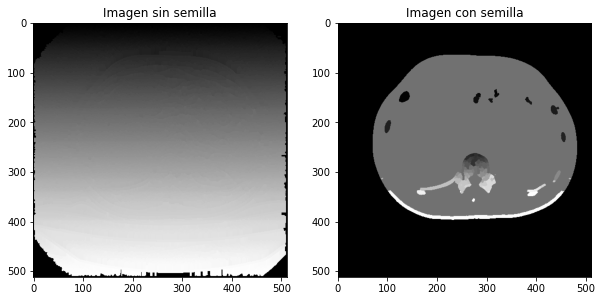

In [8]:
%matplotlib inline
final_image = WatershedExerciseP2(img,seed_coord, suavizado=True, iters=5)

En este caso, si aplicamos un anisotrópico surgen problemas en la segmentación ya que partimos de una imagen con un rango de gris muy homogéneo (el filtro lo suaviza todavía más). Esto no pasaba con los pulmones anteriormente. 

**3) Imágenes de segmentación del húmero**

Número de semillas seleccionadas: 13


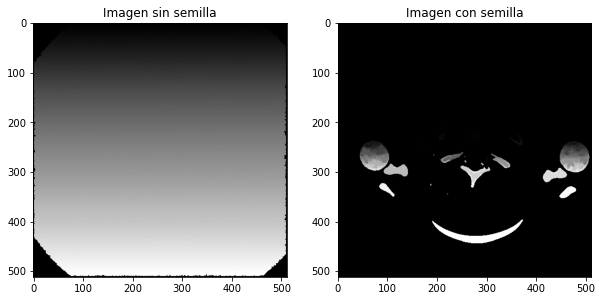

In [9]:
seed_coord,img = get_points("D0273.dcm") 
%matplotlib inline
final_image = WatershedExerciseP2(img,seed_coord) 

Número de semillas seleccionadas: 13


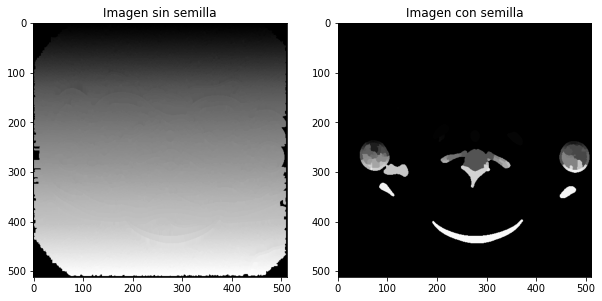

In [11]:
%matplotlib inline
final_image = WatershedExerciseP2(img,seed_coord, suavizado=True, iters=5) 

Número de semillas seleccionadas: 13


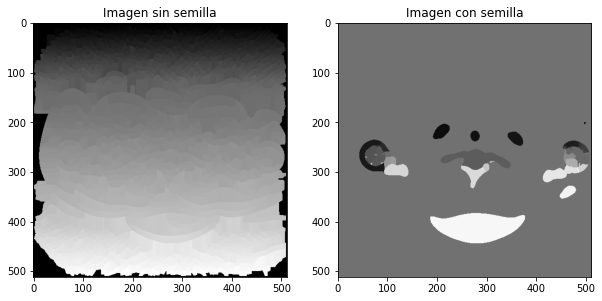

In [12]:
%matplotlib inline
final_image = WatershedExerciseP2(img,seed_coord, suavizado=True, iters=30)

En esta última segmentación, apreciamos los mismos resultados vistos en las dos anteriores.

#### **CONCLUSIÓN SOBRE LOS RESULTADOS**

#### Efecto del número de semillas introducidas
Cuando se introduce un menor número de semillas (primera imagen) se puede observar un mayor efecto "mosaico" en la región a segmentar. Si introducimos un mayor número de semillas (segunda imagen), se puede observar un gradiente casi perfecto en la región a segmentar. Esto se debe que que estamos seleccionando un mayor número de mínimos locales, y la función *iminposemin* asigna un nivel de gris distinto a cada mínimo y a su región circundante.

Por ello, cuantas más semillas seleccionemos mayor será el degradado y se podrán apreciar menos las diferencias de gris. 

Número de semillas seleccionadas: 10


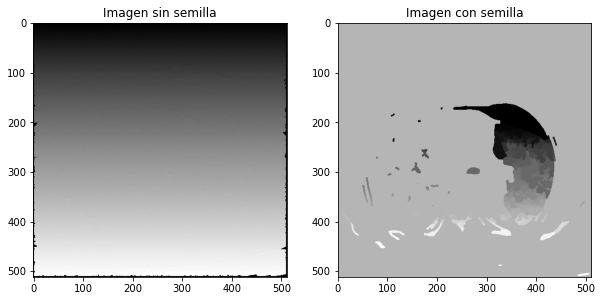

In [13]:
seed_coord,img = get_points("D0120.dcm") # menor numero de semillas
%matplotlib inline
final_image = WatershedExerciseP2(img,seed_coord, suavizado=True, iters=1)

Número de semillas seleccionadas: 409


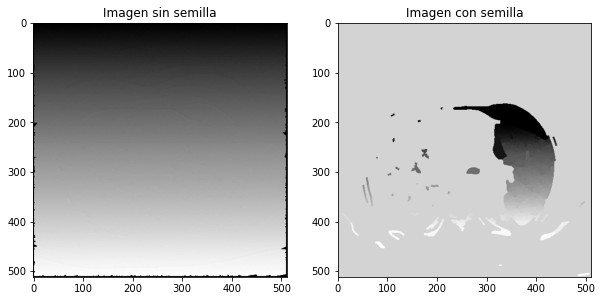

In [14]:
seed_coord,img = get_points("D0120.dcm") # mayor número de semillas
%matplotlib inline
final_image = WatershedExerciseP2(img,seed_coord, suavizado=True, iters=1)

Número de semillas seleccionadas: 3


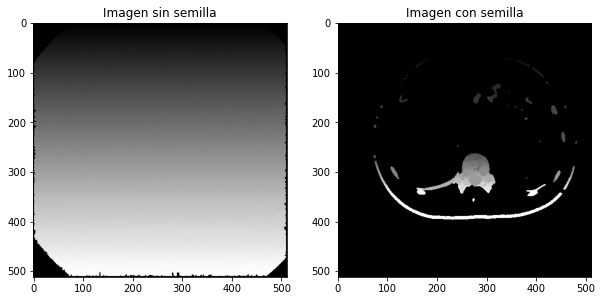

In [17]:
seed_coord,img = get_points("D0010.dcm") 
%matplotlib inline
final_image = WatershedExerciseP2(img,seed_coord, suavizado=True, iters=1)

Número de semillas seleccionadas: 65


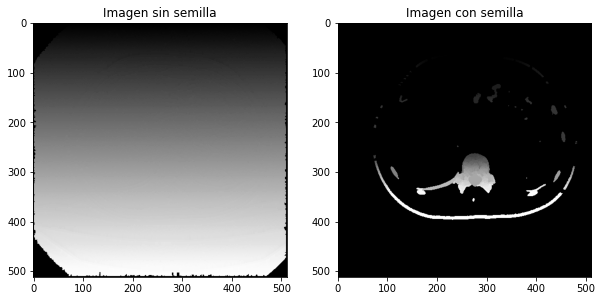

In [19]:
seed_coord,img = get_points("D0010.dcm") # mayor número de semillas
%matplotlib inline
final_image = WatershedExerciseP2(img,seed_coord, suavizado=True, iters=1)

#### Mejoras de la segmentación
Existen dos parámetros que determinan la calidad de la segmentación:
- El suavizado previo
- El número de semillas introducido (ya comentado anteriormente)

El **suavizado previo** consiste en suavizar la imagen previamente a aplicar el algoritmo de Watershed. Nos interesa un suavizado que preserve bordes ya que estamos trabajando con imágenes de gradiente y queremos conservar la resolución de contraste. Como el filtro NLM requiere mucho tiempo de ejecución, hemos utilizado el **filtro anisotrópico** implementado en la práctica anterior. 

Aplicando este filtro antes, conseguimos eliminar ruido de la imagen y reducir el número de mínimos locales de la imagen (enfatizando así los seleccionados con las semillas). Este filtrado nos permite obtener mejores resultados en imágenes donde la región de segmentación tiene un gris bastante diferenciado, pero no nos ayuda mucho en los casos en los que tenemos grises muy parecidos entre la región a segmentar y el resto de la imagen.

#### Uso de la imagen de gradiente

Se ha aplicado **watershed** sobre la imagen de gradiente de **sobel** puesto que este algoritmo detecta cuencas a partir de los mínimos locales ayudándose de los bordes generados en la imagen de gradiente, los cuales serán los máximos de la imagen.


#### Aplicación de semillas

Cuando no se usan semillas, el algoritmo toma como mínimos locales todos los mínimos presentes en la imagen, a partir de éstos se generan cuencas pero debido al alto número de mínimos el tamaño de las cuencas será muy pequeño. A cada una de estas cuencas se le va dando un valor de intensidad, siendo la primera cuenca 1 y las sucesivas el valor de la anterior +1, lo que explica que la imagen tome un degradado de negro a blanco desde el primer píxel al último.

Cuando se usan semillas, el algoritmo toma como mínimos locales los seleccionados mediante la función imimposemin además de algunos no seleccionados del resto de la imagen, apreciados como artefactos al estar fuera de la región de interés. Ahora las cuencas se generan a partir de las semillas seleccionadas y el conjunto de éstas representa la ROI.



#### Interpretación de las máscaras

Tras aplicar watershed la matriz se divide en regiones numeradas en función de la semilla a la que están asociadas, de modo que los píxeles de la matriz incluidos en esa región toman todos los valores de ésta. Por ejemplo, los píxeles de la región asociada a la primera semilla, tendrán como valor 1 y así sucesivamente. Por ello los rangos de grises que observamos al representar la imagen, carecen de valor más allá del de identificar cada región con su semilla, distintos valores de gris no indican que haya un cambio de tejido.



